In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'

def save_plot(filename):
    plt.tight_layout()
    plt.savefig(filename)
    print(f"   [Output] Chart saved as: {filename}")
    plt.close()

USD_TO_SAR = 3.75

>>> STEP 8: ANALYZING COST OF AGING & PROGRESSION...
   -> Age Impact: Costs rise by 56% from <50 to >70.
   -> Progression Impact: Keeping a patient on oral meds saves 235,994 SAR over their lifetime.


C:\Users\DSC-GDP075\AppData\Local\Temp\ipykernel_6468\315242286.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=df_lifetime, x='Patient Profile', y='Lifetime_Cost_SAR', palette=colors_life, ax=ax2)


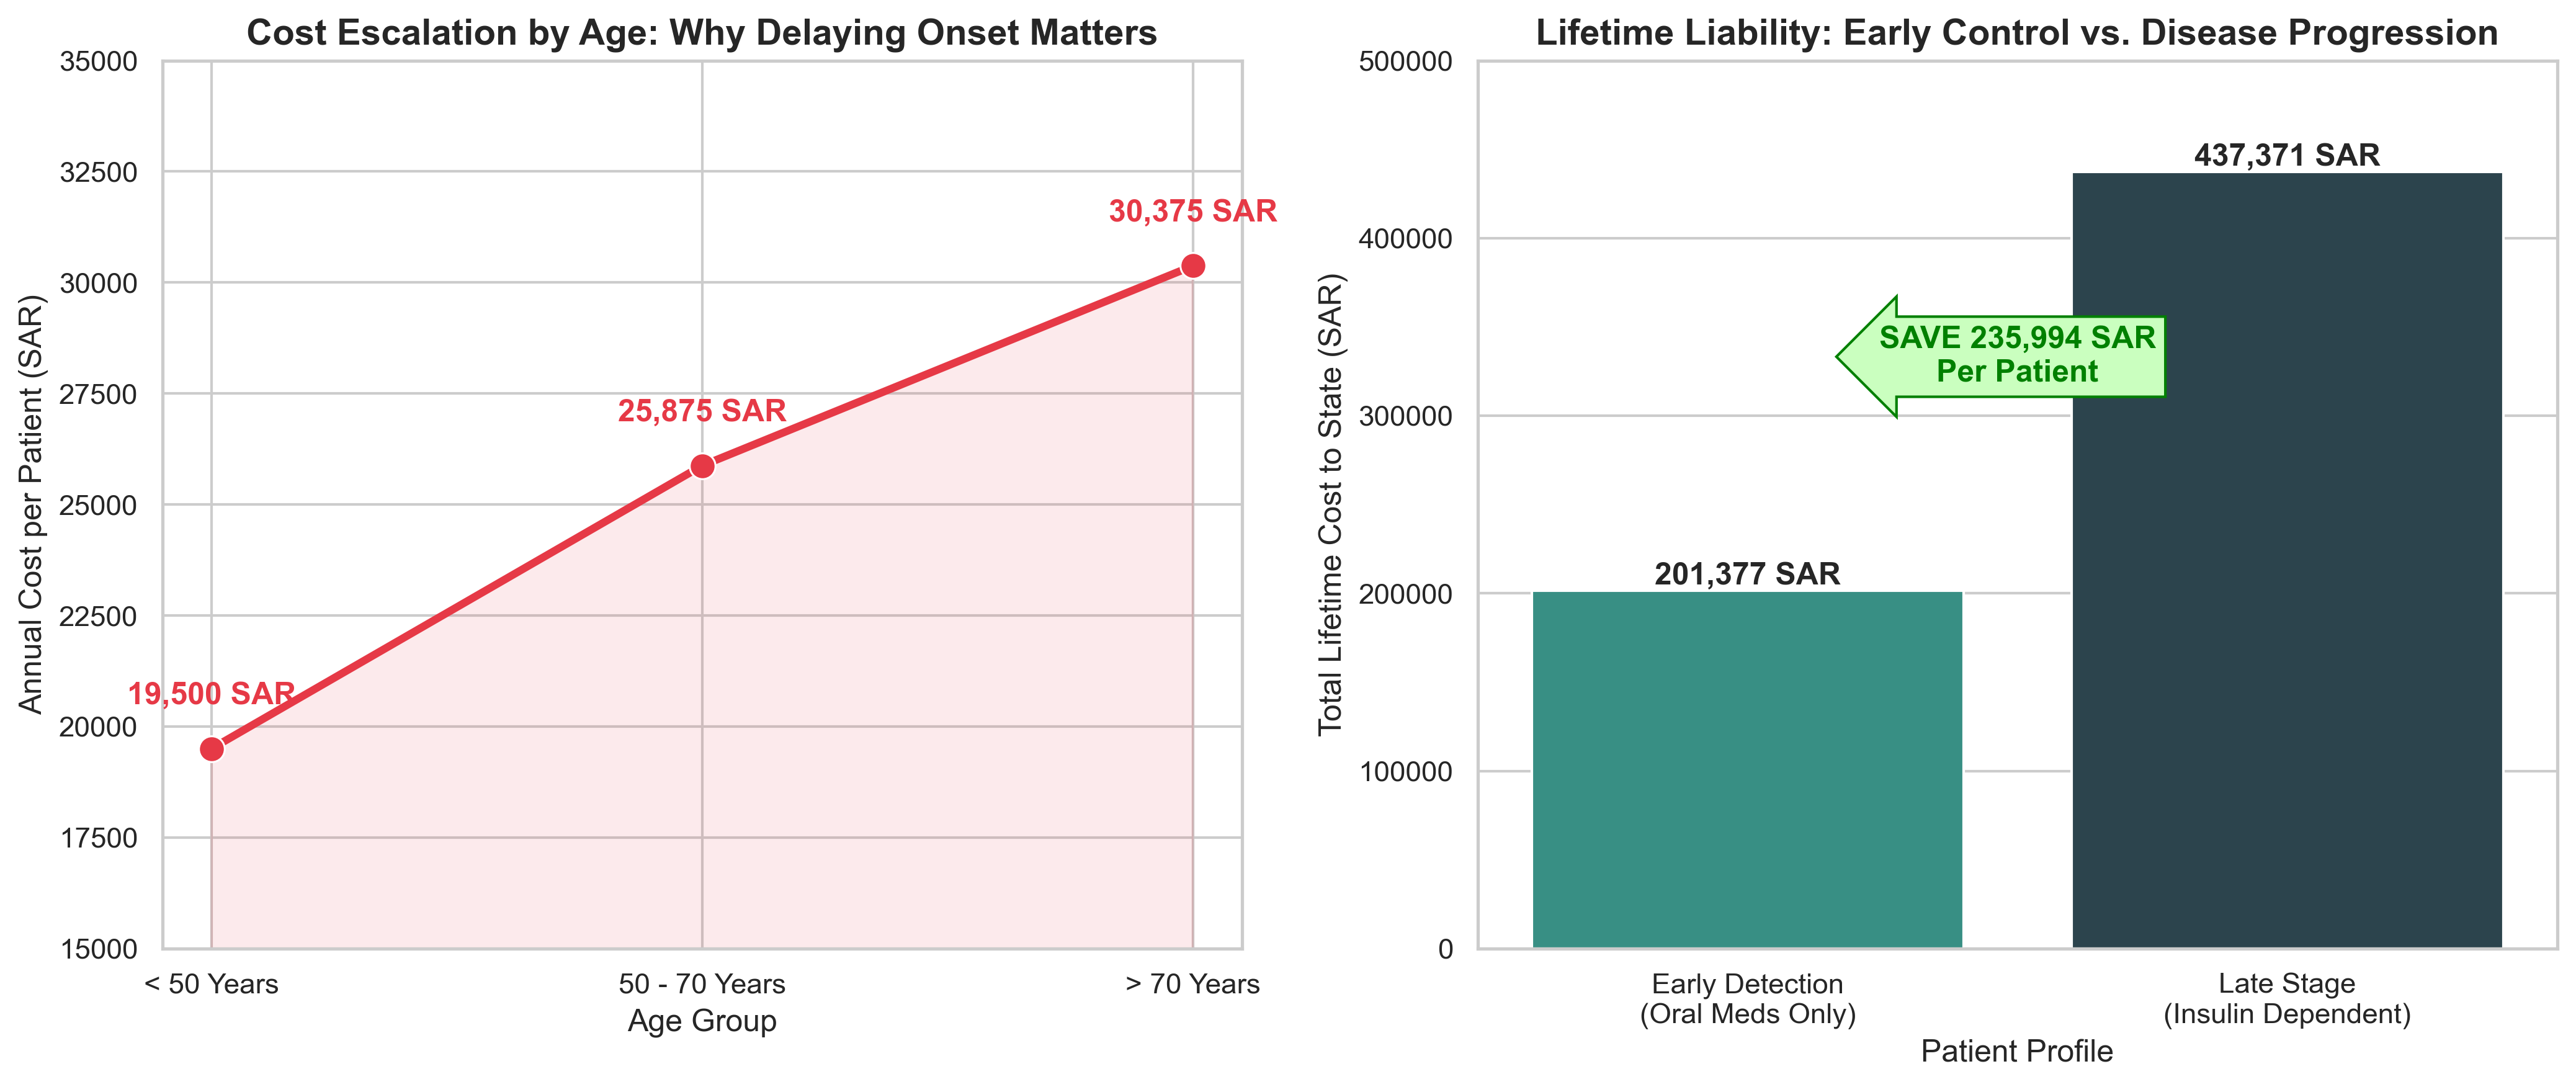

In [ ]:

print(">>> STEP 8: ANALYZING COST OF AGING & PROGRESSION...")

# A. التكلفة حسب الفئة العمرية (Age Escalation)
# المصدر: Alshammari et al. (Table 6)
# <50: $5200 | 50-70: $6900 | >70: $8100
age_data = {
    'Age Group': ['< 50 Years', '50 - 70 Years', '> 70 Years'],
    'Cost_USD': [5200, 6900, 8100]
}
df_age = pd.DataFrame(age_data)
df_age['Cost_SAR'] = df_age['Cost_USD'] * USD_TO_SAR

# B. التكلفة مدى الحياة حسب نوع العلاج (Lifetime Liability)
# المصدر: AlHarbi et al. (Table 8)
# Regimen 2 (Biguanides/Early Stage): 201,377 SAR
# Regimen 6 (Insulin/Advanced Stage): 437,371 SAR
lifetime_data = {
    'Patient Profile': ['Early Detection\n(Oral Meds Only)', 'Late Stage\n(Insulin Dependent)'],
    'Lifetime_Cost_SAR': [201377, 437371]
}
df_lifetime = pd.DataFrame(lifetime_data)

liability_savings = df_lifetime.iloc[1]['Lifetime_Cost_SAR'] - df_lifetime.iloc[0]['Lifetime_Cost_SAR']



fig8, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

sns.lineplot(data=df_age, x='Age Group', y='Cost_SAR', marker='o', markersize=10, linewidth=3, color='#e63946', ax=ax1)
ax1.fill_between(df_age['Age Group'], df_age['Cost_SAR'], color='#e63946', alpha=0.1)

ax1.set_title('Cost Escalation by Age: Why Delaying Onset Matters', fontsize=14, fontweight='bold')
ax1.set_ylabel('Annual Cost per Patient (SAR)')
ax1.set_ylim(15000, 35000)

for i, txt in enumerate(df_age['Cost_SAR']):
    ax1.text(i, txt + 1000, f"{txt:,.0f} SAR", ha='center', fontweight='bold', color='#e63946')


colors_life = ['#2a9d8f', '#264653'] # أخضر (رخيص) غامق (مكلف)
bars = sns.barplot(data=df_lifetime, x='Patient Profile', y='Lifetime_Cost_SAR', palette=colors_life, ax=ax2)

ax2.set_title('Lifetime Liability: Early Control vs. Disease Progression', fontsize=14, fontweight='bold')
ax2.set_ylabel('Total Lifetime Cost to State (SAR)')
ax2.set_ylim(0, 500000)

start_h = df_lifetime.iloc[0]['Lifetime_Cost_SAR']
end_h = df_lifetime.iloc[1]['Lifetime_Cost_SAR']
ax2.annotate(f'SAVE {liability_savings:,.0f} SAR\nPer Patient', 
             xy=(0.5, (start_h+end_h)/2), 
             ha='center', fontsize=12, fontweight='bold', color='green',
             bbox=dict(boxstyle='larrow,pad=0.3', fc='#caffbf', ec='green'))

for p in bars.patches:
    ax2.annotate(f'{p.get_height():,.0f} SAR', (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom', fontsize=12, weight='bold')

plt.tight_layout()
#save_plot('Page8_Cost_of_Progression.png')

print(f"   -> Age Impact: Costs rise by {(df_age.iloc[2]['Cost_SAR']/df_age.iloc[0]['Cost_SAR'] - 1)*100:.0f}% from <50 to >70.")
print(f"   -> Progression Impact: Keeping a patient on oral meds saves {liability_savings:,.0f} SAR over their lifetime.")

>>> STEP 9: ANALYZING DISEASE VELOCITY & FACILITY EFFICIENCY...


C:\Users\DSC-GDP075\AppData\Local\Temp\ipykernel_6468\875485725.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=df_facility, x='Facility Type', y='Cost_SAR', palette=['#2a9d8f', '#264653'], ax=ax2)


   -> Fastest Growing Disease: Colorectal Cancer (+97%).
   -> Efficiency Savings: Treating in General Hospitals saves 6,375 SAR per patient.


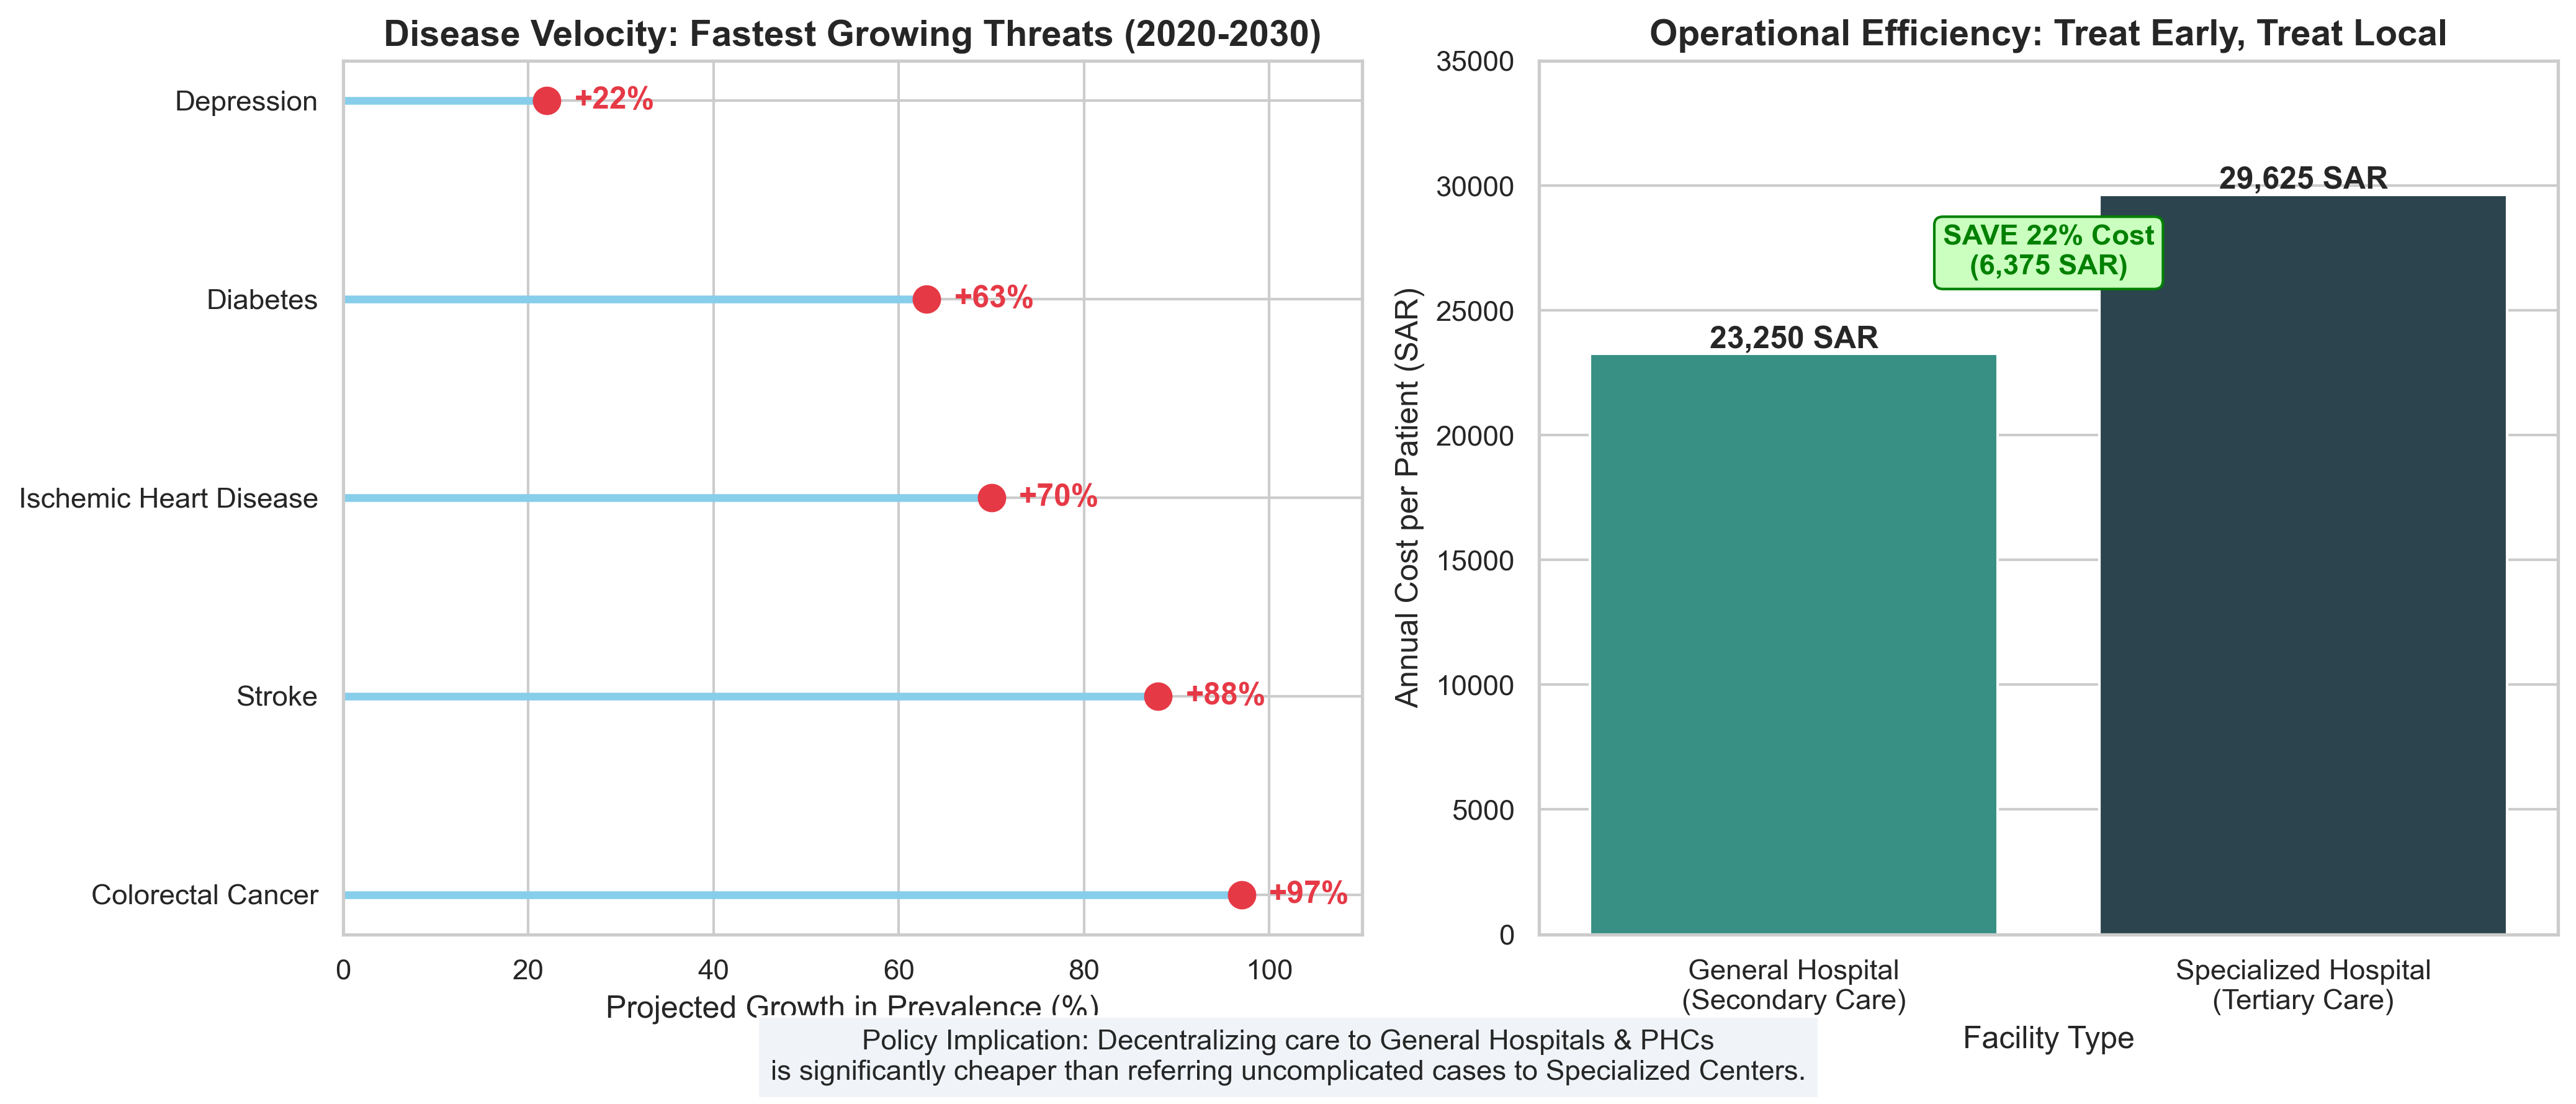

In [ ]:

sns.set_theme(style="whitegrid")
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'

def save_plot(filename):
    plt.tight_layout()
    plt.savefig(filename)
    print(f"   [Output] Chart saved as: {filename}")
    plt.close()

USD_TO_SAR = 3.75

print(">>> STEP 9: ANALYZING DISEASE VELOCITY & FACILITY EFFICIENCY...")

growth_data = {
    'Disease': ['Colorectal Cancer', 'Stroke', 'Ischemic Heart Disease', 'Diabetes', 'Depression'],
    'Growth_Rate_2030': [97, 88, 70, 63, 22] # نسب النمو المئوية المتوقعة
}
df_growth = pd.DataFrame(growth_data)
df_growth = df_growth.sort_values('Growth_Rate_2030', ascending=False)

# B. تكلفة المريض حسب نوع المنشأة (Facility Efficiency)
# المصدر: Alshammari et al. (Table 6)
# KKH (General): $6200 | KSSH (Specialized): $7900
facility_data = {
    'Facility Type': ['General Hospital\n(Secondary Care)', 'Specialized Hospital\n(Tertiary Care)'],
    'Cost_USD': [6200, 7900]
}
df_facility = pd.DataFrame(facility_data)
df_facility['Cost_SAR'] = df_facility['Cost_USD'] * USD_TO_SAR

efficiency_savings = df_facility.iloc[1]['Cost_SAR'] - df_facility.iloc[0]['Cost_SAR']
efficiency_pct = (efficiency_savings / df_facility.iloc[1]['Cost_SAR']) * 100



fig9, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))


ax1.hlines(y=df_growth['Disease'], xmin=0, xmax=df_growth['Growth_Rate_2030'], color='skyblue', linewidth=3)
ax1.plot(df_growth['Growth_Rate_2030'], df_growth['Disease'], "o", markersize=10, color='#e63946')

ax1.set_title('Disease Velocity: Fastest Growing Threats (2020-2030)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Projected Growth in Prevalence (%)')

for i, txt in enumerate(df_growth['Growth_Rate_2030']):
    ax1.text(txt + 3, i, f"+{txt}%", va='center', fontweight='bold', color='#e63946')

ax1.set_xlim(0, 110) 


bars = sns.barplot(data=df_facility, x='Facility Type', y='Cost_SAR', palette=['#2a9d8f', '#264653'], ax=ax2)

ax2.set_title('Operational Efficiency: Treat Early, Treat Local', fontsize=14, fontweight='bold')
ax2.set_ylabel('Annual Cost per Patient (SAR)')
ax2.set_ylim(0, 35000)

start_h = df_facility.iloc[0]['Cost_SAR']
end_h = df_facility.iloc[1]['Cost_SAR']
ax2.annotate(f'SAVE {efficiency_pct:.0f}% Cost\n({efficiency_savings:,.0f} SAR)', 
             xy=(0.5, (start_h+end_h)/2), 
             ha='center', fontsize=11, fontweight='bold', color='green',
             bbox=dict(boxstyle='round', fc='#caffbf', ec='green'))

for p in bars.patches:
    ax2.annotate(f'{p.get_height():,.0f} SAR', (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom', fontsize=12, weight='bold')

insight = ("Policy Implication: Decentralizing care to General Hospitals & PHCs\n"
           "is significantly cheaper than referring uncomplicated cases to Specialized Centers.")
plt.figtext(0.5, 0.02, insight, ha="center", fontsize=11, bbox={"facecolor":"#f0f4f8", "alpha":1, "pad":5})

plt.tight_layout()
plt.subplots_adjust(bottom=0.15) 

#save_plot('Page9_Efficiency_Priorities.png')

print(f"   -> Fastest Growing Disease: {df_growth.iloc[0]['Disease']} (+{df_growth.iloc[0]['Growth_Rate_2030']}%).")
print(f"   -> Efficiency Savings: Treating in General Hospitals saves {efficiency_savings:,.0f} SAR per patient.")